### DL-LA AVG 1 Mask

In [2]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

In [3]:
d_len = 5083400
d_file_len = 5083400
num_files = 50834

In [4]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [5]:
def concatDataLabel(path):
    mats = []
    index = 0 
    fileNames = np.arange(50, 20050, 50).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"labels_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats) 
    myArray = []
    for i in range(0,400):
        for j in range(0,50):
            myArray.append(mats[i]['data'][0][j])
    return(myArray)

In [14]:
df_data = concatDataTraces('../real_traces/SBOX_traces2019-12-18_17_31_01/spot_4_12/sliced/')

In [7]:
for i in range(0,len(df_data)):
    df_data[i] = df_data[i]

In [8]:
len(df_data)

508340

In [9]:
counter = 0
df_new_label = []
for i in range(0,len(df_data)):
    if counter == 0:
        df_new_label.append(0)
        counter = 1
    else:
        df_new_label.append(1)
        counter = 0

In [10]:
df_label = df_new_label

In [11]:
from keras import backend as k

In [12]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=125000, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [13]:
tmpModel = createMLPModel()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
x = tf.placeholder('float32',shape =(None,5000))

In [16]:
x_trainA, x_validA, y_trainA, y_validA = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [17]:
trainedModel = tmpModel.fit(x=[x_trainA[0:10000]],
                            y=to_categorical(y_trainA[0:10000],num_classes=2),
                            batch_size=100,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
10000/10000 [==============================] - 1s 133us/step - loss: 0.2698 - accuracy: 0.5358
Epoch 2/30
10000/10000 [==============================] - 1s 123us/step - loss: 0.2425 - accuracy: 0.5664
Epoch 3/30
10000/10000 [==============================] - 1s 124us/step - loss: 0.2336 - accuracy: 0.5870
Epoch 4/30
10000/10000 [==============================] - 1s 127us/step - loss: 0.2282 - accuracy: 0.6059
Epoch 5/30
10000/10000 [==============================] - 1s 126us/step - loss: 0.2211 - accuracy: 0.6322
Epoch 6/30
10000/10000 [==============================] - 1s 125us/step - loss: 0.2135 - accuracy: 0.6444
Epoch 7/30
10000/10000 [==============================] - 1s 124us/step - loss: 0.2047 - accuracy: 0.6705
Epoch 8/30
10000/10000 [==============================] - 1s 122us/step - loss: 0.1908 - accuracy: 0.7040
Epoch 9/30
10000/10000 [==============================] - 1s 128us/step - loss: 0.1830 - accuracy: 0.7215
Epoch 10/30
10000/10000 [=====================

In [18]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [19]:
iterate = K.function([tmpModel.input], [gradient])

In [20]:
grad = iterate(np.array(x_validA[0:50]))

In [21]:
grad

[[array([[-6.6065205e-12,  5.9493200e-12, -5.4660269e-11, ...,
          -2.2730531e-12,  1.1866698e-10,  2.9125920e-11],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

In [1]:
tmpArr = []
for i in range(0,125000):
    tmpArr.append(np.mean(grad[0][0][:,i]))

NameError: name 'np' is not defined

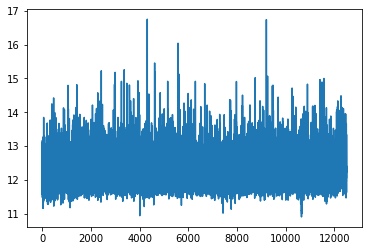

In [23]:
plt.plot(-np.log10(np.abs(tmpArr)))
plt.show()

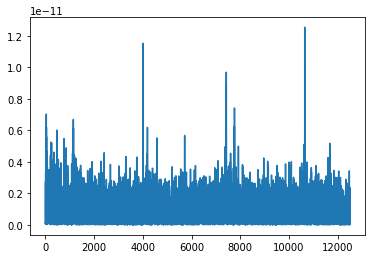

In [29]:
plt.plot(np.abs(tmpArr))
plt.show()

In [24]:
collectA = []
for i in range(1,1000,500):
    grad = iterate(np.array(x_validA[0:i],dtype=np.float128))
    collectA.append(np.max(-np.log10(np.abs(grad[0][0][0]))))

/home/pace/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [25]:
grad = iterate(np.array(x_validA[0:50000]))

In [26]:
np.max(-np.log10(np.abs(grad[0][0][0])))

/home/pace/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


inf

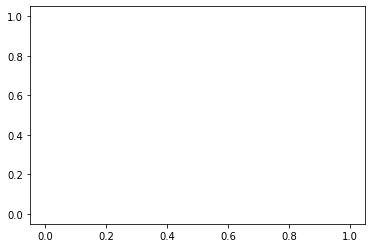

In [27]:
plt.plot(collectA)